In [ ]:
#importing all the necessary libraries
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import numpy as np
import scipy


In [ ]:
pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     |████████████████████████████████| 176.0 MB 6.3 kB/s 
  Created wheel for h2o: filename=h2o-3.36.0.2-py2.py3-none-any.whl size=176112127 sha256=15c1cfc941d1d457f7df68653d187eb669a7bf914957fd2dcdd62965e1386893
  Stored in directory: /root/.cache/pip/wheels/0b/83/bd/343a6140119b4098103e725e1cfe9f198568d13cf103acbc7c
Successfully built h2o


In [ ]:
# Set a minimum memory size and a run time in seconds
min_mem_size=6 
run_time=222

In [ ]:
# Use 50% of availible resources
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

6


In [ ]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:26189 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.13" 2021-10-19; OpenJDK Runtime Environment (build 11.0.13+8-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.13+8-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpry_6my1m
  JVM stdout: /tmp/tmpry_6my1m/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpry_6my1m/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:26189
Connecting to H2O server at http://127.0.0.1:26189 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.2
H2O_cluster_version_age:,13 days
H2O_cluster_name:,H2O_from_python_unknownUser_qumprh
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
# Import the processed data from notebook One
df1 = pd.read_csv("disha.csv")


In [ ]:
df1.columns =['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight' , 'Shell_weight', 'Rings']
df1

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [ ]:
#finding out basic statistics of dataset
df1.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000


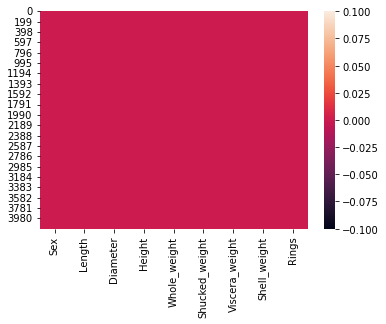

In [ ]:
#graphical mapping of null values
sns.heatmap(df1.isnull())

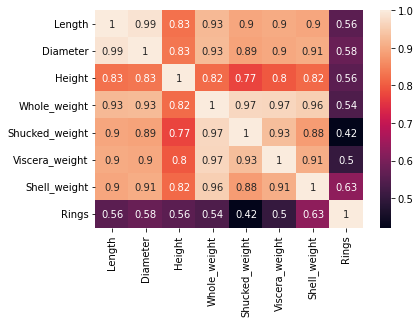

In [ ]:
sns.heatmap(df1.corr(),annot= True)

In [ ]:
df1.corr()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Length,1.000000,0.986813,0.827552,0.925255,0.897905,0.903010,0.897697,0.557123
Diameter,0.986813,1.000000,0.833705,0.925452,0.893159,0.899726,0.905328,0.575005
Height,0.827552,0.833705,1.000000,0.819209,0.774957,0.798293,0.817326,0.558109
Whole_weight,0.925255,0.925452,0.819209,1.000000,0.969403,0.966372,0.955351,0.540818
Shucked_weight,0.897905,0.893159,0.774957,0.969403,1.000000,0.931956,0.882606,0.421256
Viscera_weight,0.903010,0.899726,0.798293,0.966372,0.931956,1.000000,0.907647,0.504274
Shell_weight,0.897697,0.905328,0.817326,0.955351,0.882606,0.907647,1.000000,0.628031
Rings,0.557123,0.575005,0.558109,0.540818,0.421256,0.504274,0.628031,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3517890850>,
      dtype=object)

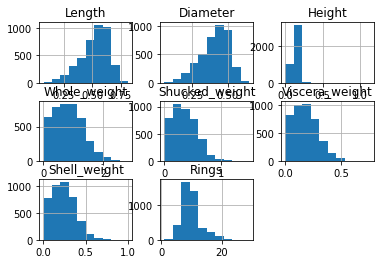

In [ ]:
#histogram - distrubution of frequency
df1.hist()

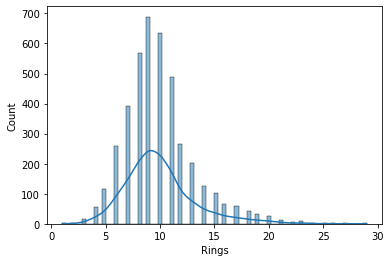

In [ ]:
# to check bell curve for normal distrubution
sns.histplot(df1.Rings, kde = True)

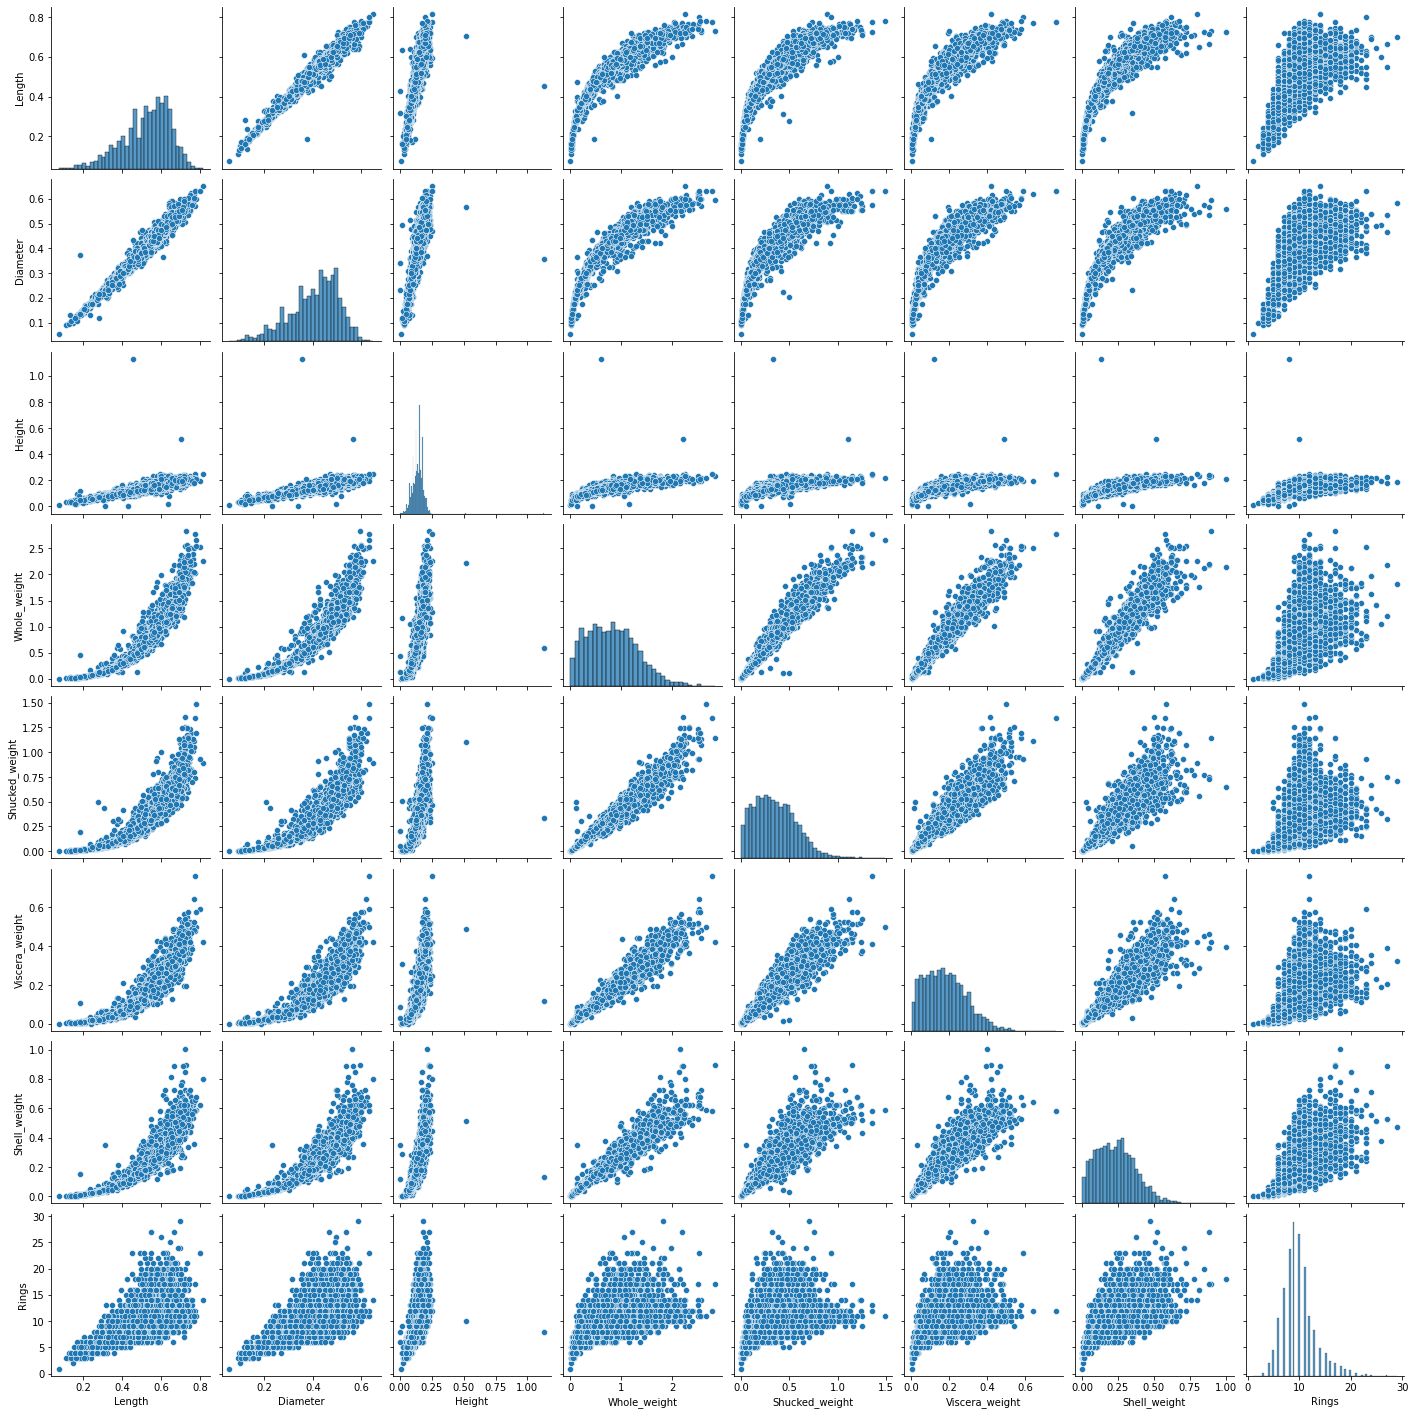

In [ ]:
#getting an idea of relation between variables
sns.pairplot(df1)

In [ ]:
# Create a 80/20 train/test split
url = "disha.csv"
df = h2o.import_file(path = url)
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
print(df_train.shape)
print(df_test.shape)

(3371, 9)
(805, 9)


In [ ]:
# Set the features and target
X=df.columns
print(X)

['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']


In [ ]:
# Set target and predictor variables
y ='Rings'
X.remove(y) 
print(X)

['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']


In [ ]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [ ]:
aml.train(x=X,y=y,training_frame=df_train)  

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_4_AutoML_1_20220208_05106

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 3.145343704872161
RMSE: 1.7735116872668646
MAE: 1.2648047878274298
RMSLE: 0.14413136330622944
R^2: 0.7045734667217616
Mean Residual Deviance: 3.145343704872161
Null degrees of freedom: 3370
Residual degrees of freedom: 3362
Null deviance: 35890.32275289231
Residual deviance: 10602.953629124055
AIC: 13449.390597977485

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 4.537026656326484
RMSE: 2.130029731324538
MAE: 1.5057276551641454
RMSLE: 0.17168155038608898
R^2: 0.5738595898460108
Mean Residual Deviance: 4.537026656326484
Null degrees of freedom: 3370
Residual degrees of freedom: 3361
Null deviance: 35906.09811025053


In [ ]:
print(aml.leaderboard)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_4_AutoML_1_20220208_05106,4.53703,2.13003,4.53703,1.50573,0.171682
StackedEnsemble_AllModels_3_AutoML_1_20220208_05106,4.5421,2.13122,4.5421,1.5053,0.17169
StackedEnsemble_BestOfFamily_4_AutoML_1_20220208_05106,4.54695,2.13236,4.54695,1.50727,0.171854
StackedEnsemble_AllModels_1_AutoML_1_20220208_05106,4.55899,2.13518,4.55899,1.51077,0.172325
StackedEnsemble_AllModels_2_AutoML_1_20220208_05106,4.56713,2.13708,4.56713,1.51151,0.172325
StackedEnsemble_BestOfFamily_3_AutoML_1_20220208_05106,4.58016,2.14013,4.58016,1.51406,0.172442
StackedEnsemble_BestOfFamily_2_AutoML_1_20220208_05106,4.59465,2.14351,4.59465,1.51892,0.173083
StackedEnsemble_BestOfFamily_1_AutoML_1_20220208_05106,4.61251,2.14768,4.61251,1.52407,0.174296
GBM_grid_1_AutoML_1_20220208_05106_model_29,4.64978,2.15633,4.64978,1.5173,0.17355
GBM_grid_1_AutoML_1_20220208_05106_model_3,4.66134,2.15901,4.66134,1.52037,0.174237


In [ ]:
#Understanding the leaderboard
model_index=0
glm_index=0
glm_model=''
aml_leaderboard_df=aml.leaderboard.as_data_frame()
models_dict={}
for m in aml_leaderboard_df['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break 
  model_index=model_index+1  

for m in aml_leaderboard_df['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break  
  glm_index=glm_index+1     
models_dict

{'StackedEnsemble_AllModels_4_AutoML_1_20220208_05106': 0,
 'StackedEnsemble_AllModels_3_AutoML_1_20220208_05106': 1,
 'StackedEnsemble_BestOfFamily_4_AutoML_1_20220208_05106': 2,
 'StackedEnsemble_AllModels_1_AutoML_1_20220208_05106': 3,
 'StackedEnsemble_AllModels_2_AutoML_1_20220208_05106': 4,
 'StackedEnsemble_BestOfFamily_3_AutoML_1_20220208_05106': 5,
 'StackedEnsemble_BestOfFamily_2_AutoML_1_20220208_05106': 6,
 'StackedEnsemble_BestOfFamily_1_AutoML_1_20220208_05106': 7,
 'GBM_grid_1_AutoML_1_20220208_05106_model_29': 8,
 'GLM_1_AutoML_1_20220208_05106': 59}

In [ ]:
#Examine the leaderboard
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index,'model_id'])

8


In [ ]:
best_model.algo

'gbm'

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category = matplotlib.cbook.mplDeprecation)

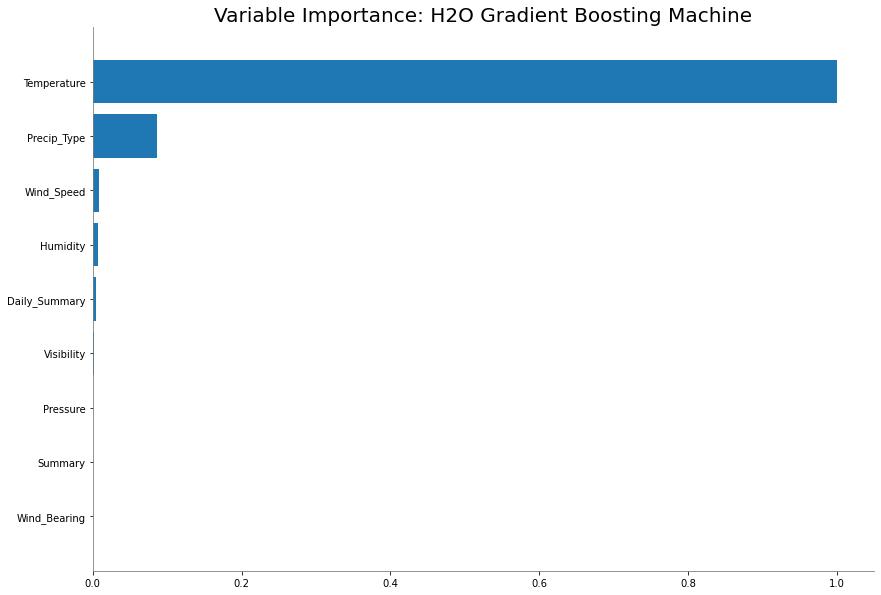

<Figure size 432x288 with 0 Axes>

In [ ]:
if best_model.algo in ['gbm','drf','xrt','xgboost']:
  best_model.varimp_plot()

<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-57-dd7790b8306f>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if glm_index is not 0:


59
glm


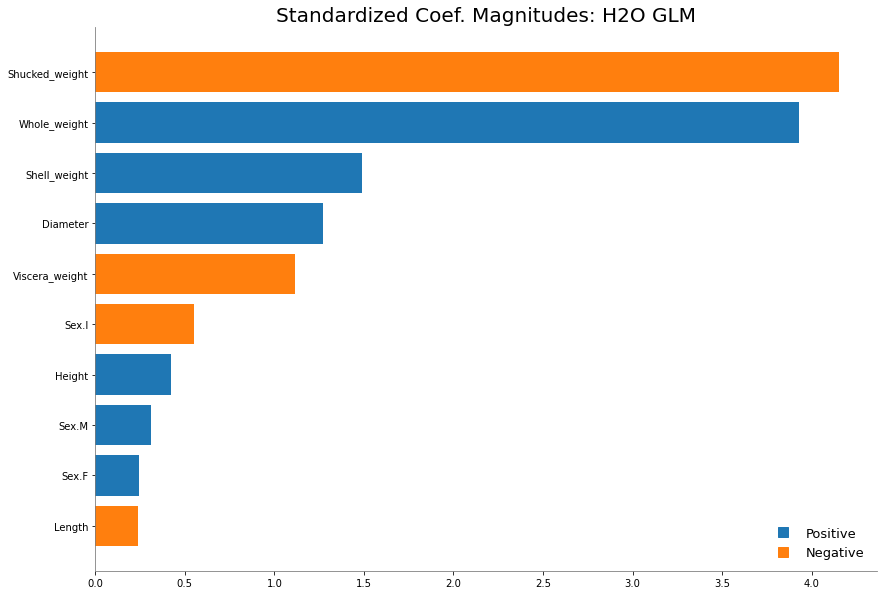

In [ ]:
if glm_index is not 0:
  print(glm_index)
  glm_model=h2o.get_model(aml.leaderboard[glm_index,'model_id'])
  print(glm_model.algo) 
  glm_model.std_coef_plot()

In [ ]:
print(best_model.rmse(train = True))

1.8873111457062755


In [ ]:
def model_performance_stats(perf):
    d={}
    try:    
      d['mse']=perf.mse()
    except:
      pass      
    try:    
      d['rmse']=perf.rmse() 
    except:
      pass      
    try:    
      d['null_degrees_of_freedom']=perf.null_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_degrees_of_freedom']=perf.residual_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_deviance']=perf.residual_deviance() 
    except:
      pass      
    try:    
      d['null_deviance']=perf.null_deviance() 
    except:
      pass      
    try:    
      d['aic']=perf.aic() 
    except:
      pass      
    try:
      d['logloss']=perf.logloss() 
    except:
      pass    
    try:
      d['auc']=perf.auc()
    except:
      pass  
    try:
      d['gini']=perf.gini()
    except:
      pass    
    return d

In [ ]:
mod_perf=best_model.model_performance(df_test)
stats_test={}
stats_test=model_performance_stats(mod_perf)
stats_test

{'mse': 4.114609873156871,
 'rmse': 2.0284501160139166,
 'null_degrees_of_freedom': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'null_deviance': None}

In [ ]:
predictions = best_model.predict(df_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
y_pred=h2o.as_list(predictions)
y_pred[0:5]

,predict
0,9.853176
1,14.816209
2,9.093418
3,12.277252
4,8.472945


In [ ]:
#Partial Dependency Plots
print(X)

['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']


PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%

PartialDependence: Partial Dependence Plot of model GBM_grid_1_AutoML_1_20220208_05106_model_29 on column 'Rings'.


,rings,mean_response,stddev_response,std_error_mean_response
0,1.000000,9.954123,2.492322,0.038568
1,2.473684,9.954123,2.492322,0.038568
2,3.947368,9.954123,2.492322,0.038568
3,5.421053,9.954123,2.492322,0.038568
4,6.894737,9.954123,2.492322,0.038568
5,8.368421,9.954123,2.492322,0.038568
6,9.842105,9.954123,2.492322,0.038568
7,11.315789,9.954123,2.492322,0.038568
8,12.789474,9.954123,2.492322,0.038568
9,14.263158,9.954123,2.492322,0.038568


[]

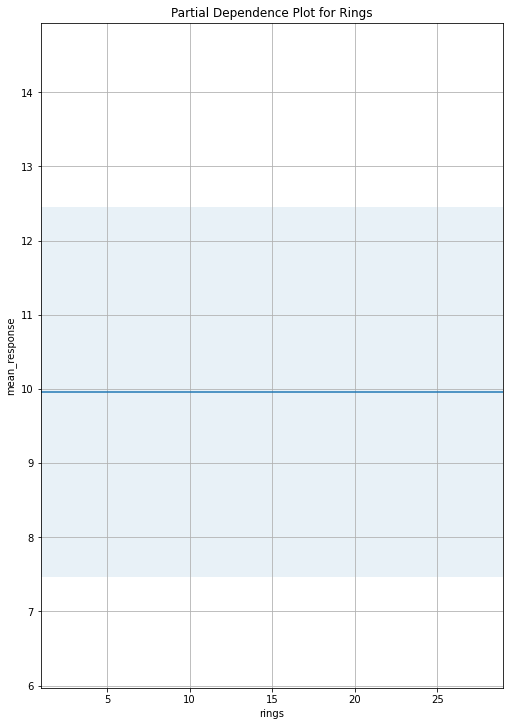

In [ ]:
best_model.partial_plot(df, cols=['Rings'])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
h2o.cluster().shutdown()

In [ ]:
df1

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [ ]:
import statsmodels.formula.api as smf #OLS model Library

results = smf.ols('Rings ~ Length + Height + Whole_weight + Shucked_weight + Viscera_weight ', data=df1).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     891.0
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        00:57:13   Log-Likelihood:                -9295.5
No. Observations:                4176   AIC:                         1.860e+04
Df Residuals:                    4170   BIC:                         1.864e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.6220      0.269      9.758      0.000       2.095       3.149
Length             9.2181      0.808     11.403      0.000       7.633      10.803
Height            14.4789      1.544      9.377      0.000      11.452      17.506
Whole_weight      14.2048      0.441     32.181      0.000      13.339      15.070
Shucked_weight   -24.5823      0.646    -38.056      0.000     -25.849     -23.316
Viscera_weight   -13.7225      1.240    -11.064      0.000     -16.154     -11.291
==============================================================================
Omnibus:                      937.936   Durbin-Watson:                   1.371
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2795.424
Skew:                           1.155   Prob(JB):                         0.00
Kurtosis:                       6.275   Cond. No.                         69.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Copyright (c) 2021 Disha Vasvani

 

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

 

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

 

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

In [ ]:
#hyperparamters

In [ ]:
import pandas as pd
X = pd.read_csv('disha1.csv')
y = X['Rings']
X = X.drop(['Rings'], axis=1)
X = X.drop(['Sex_I'], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, random_state = 0, test_size = 0.2)

NameError: ignored

NameError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
XGBClassifier()
X.shape

NameError: ignored

In [ ]:
model = XGBClassifier( max_dept = 2 , subsample = 1)
model.fit(X_train, y_train)
y_predict = model.predict (X_test)
from sklearn.metrics import accuracy_score, classification_report
print (accuracy_score(y_test, y_predict))
print()
pd.crosstab(y_test, y_predict)

0.26435406698564595



col_0,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Rings,,,,,,,,,,,,,,,,,,,,,
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,5,8,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,4,10,11,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,5,15,29,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,0,2,13,36,19,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,1,3,37,33,33,9,2,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,1,14,26,52,28,11,0,0,0,0,0,0,0,0,0,0,1,0
10,0,0,0,1,11,17,49,33,19,4,2,0,0,0,1,0,0,0,0,0,2
11,0,0,0,1,4,7,23,31,23,1,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
model = XGBClassifier ( max_dept = 2, subsample = 1, n_estimators = 400, learning_rate = 0.025 )
model.fit(X_train, y_train)
y_train_predict = model.predict(X_train)
from sklearn.metrics import accuracy_score
print('Train accuracy', accuracy_score(y_train, y_train_predict))
print('Test accuracy', accuracy_score(y_test, y_predict))

Train accuracy 0.4676646706586826
Test accuracy 0.26435406698564595


In [ ]:
df1 = pd.read_csv('disha1.csv')
df1.corr()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_I,Sex_M
Length,1.000000,0.986813,0.827552,0.925255,0.897905,0.903010,0.897697,0.557123,-0.551613,0.236783
Diameter,0.986813,1.000000,0.833705,0.925452,0.893159,0.899726,0.905328,0.575005,-0.564431,0.240567
Height,0.827552,0.833705,1.000000,0.819209,0.774957,0.798293,0.817326,0.558109,-0.518828,0.215869
Whole_weight,0.925255,0.925452,0.819209,1.000000,0.969403,0.966372,0.955351,0.540818,-0.557757,0.252305
Shucked_weight,0.897905,0.893159,0.774957,0.969403,1.000000,0.931956,0.882606,0.421256,-0.521995,0.252048
Viscera_weight,0.903010,0.899726,0.798293,0.966372,0.931956,1.000000,0.907647,0.504274,-0.556267,0.242489
Shell_weight,0.897697,0.905328,0.817326,0.955351,0.882606,0.907647,1.000000,0.628031,-0.547116,0.235652
Rings,0.557123,0.575005,0.558109,0.540818,0.421256,0.504274,0.628031,1.000000,-0.435958,0.181426
Sex_I,-0.551613,-0.564431,-0.518828,-0.557757,-0.521995,-0.556267,-0.547116,-0.435958,1.000000,-0.522462
Sex_M,0.236783,0.240567,0.215869,0.252305,0.252048,0.242489,0.235652,0.181426,-0.522462,1.000000


Is the relationship significant?
The p-value, or probability value tells you how likely data could have occurred under the null-hypothesis.The p-value is a proportion:if the value is 0.05,that means that 5% of the time you would see a test statistic at least as extreme as the one you found if the null hypothesis was true.P-values are calculated from the deviation between the observed value and a chose reference value,given the probability distribution of the statistic,with a greater difference between the two values corresponding to a lower p-value.Dataset's p-value is less than 0.5,hence the relationship is significant.


Are any model assumptions violated?

Linear models make some strong assumptions concerning the data structure:

1.Independence of each data points.
2.Correct distribution of the residuals
3.Correct specification of the variance structure
4.Linear relationship between the response and the linear predictor


Is there any multicollinearity in the model?
Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model.This means that an independent variable can be predicted from another independent variable in a regression model.Multicollinearity can be a problem in a regression model because we would not be able to distinguish between the individual effects of the independent variables on the dependent variable.In this model,the variables are co-related with each other hence there is multicollinearity in the model.

In the multivariate models are predictor variables independent of all the other predictor variables?
In classification,the predictor variables are the clues given to the model so it can decide what target variable to assign to each example.Predictor variable used for classification are also known as input variables or predictors.If a feature is chosen to be used as input for the model,the value of that feature would then be thought of as a predictor variable.Since,the variables are collinear with each other,the predictor variables in this model are dependent on each other.

In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

A multivariate model is a statistical tool that uses multiple variables to forecast outcomes.It can be thought of as a model in which multiple variables are found on the right side of the equation.This type of statistical model can be used to access the relationship between a number of variables;one can access independent relationships while adjusting for potential cofounders.In the above bar-graph,temperature is the most significant predictor variable.

Does the model make sense?

The accuracy of the model is good,but the RSME value is above 1.So,there are errors in the model which can be avoided by doing feature selection or by adding data to the dataset for better analysis and training of the model.




Which independent variables are significant?

Independent variables are the input for a process that is being analyzes.An independent variable is a variable that is changed or controlled in a scientific experiement in order to test the effects it will have on the dependent variable.In this model,Intercept,weight,height,whole_weight,shucked_weight,viscera_weight are the independent variables which are significant.

Which hyperparameters are important?
Hyperparameters are parameters whose values control the learning process and determine the values of model parameters that a learning algorithm ends up learning.Parameters in machine learning and deep learning are the values your learning algorithm can change independently as it learns and these values are affected by choice of hyperparameters you provide.

Does the model make sense?
Since, the value of R square is 0.53 the model is moderate accurate. Hyper paramter tunning, Treat missing and Outlier values, Feature engineering are some of the methods which can be useful to increase the accurancy and reduce the errors.

Coding Professionalism?

Unit Texting is done

Proper code indentation is followed

Comments are added whenever required

License is added to the file

Github is required to keep track of changes and maintain versioning.


Regularization is a technique used for tuning the function by adding an additional penalty term in the error function.The additional term controls the excessively fluctuating function such that the coefficients don't take extreme values.

Abstract : The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value.

Conclusion:In this model,the variables are co-related with each other hence there is multicollinearity in the model.The GBM model worked pretty well for the regression dataset with good accuracy.For original data according to each category in the variable.Apart from H20 AutoML execution.
I have successfully calculated the best parameters using hyperparameters tunning.Also,I have performed the regularization and concluded that it did not help me to increase the accuracy.Analyze and plotted the dataset using seaborn and pandas library to find the relationships and correlation between and columns.